<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

#### Problem Statement
    General Assembly Academy is planning to launch a new institution focused on standardized test preparation, specifically the ACT and SAT. The goal is to identify the best states to establish the institution and determine which subjects should be included in an intensive program.

#### Background
    The ACT is a standardized test that consists of four main sections: English, Math, Reading, and Science. Each section is scored on a scale of 1 to 36, and the composite score, which represents each tester, is the average of the four section scores, rounded to the nearest whole number. The maximum composite score is 36. Additionally, there is an optional Writing section, which is scored separately on a scale of 2 to 12.

    In contrary, the SAT is a standardized test that consists of three main sections: Evidence-Based Reading and Writing, and Math. Each section has a maximum score of 800, making the total maximum score 1600. The score representing each tester is called the total score, which is the sum of the scores from the Evidence-Based Reading and Writing section and the Math section. There is an optional Essay section, which is scored separately on a scale of 2 to 8.

    In the U.S., different states tend to favor either the ACT or the SAT based on their educational policies; however, students from specific states have the flexibility to choose their preferred test.

#### Datasets

The datasets used in this analysis are:

- [`act_2017.csv`](./data/act_2017.csv): 2017 ACT scores by states, has columns State, Participation, English, Math, Reading, Science and Composite
- [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT scores by states, has columns State, Participation, Evidence-Based Reading and Writing, Math, Total

#### Analysis

##### Import Essential Libraries

pandas, numpy, matplotlib.pyplot, matplotlib.patches, seaborn, math

##### Data Cleaning Step

- Check the key for merging 2 DataFrames together, i.e., states
- Convert data types of each columns to appropiate types
- Handling NaNs by patching the data to reasonable values
- Adding the abbreviations of each state and adding the coordinate for making graph

##### Methodology

- The ideal states for establishing the institution should have many students taking both the ACT and SAT. This can be determined by examining the participation rates of both tests, using the median as a guide. If the participation rates for both tests are greater than the median, then those states are considered ideal.
- To determine which subjects should be included in an intensive program, we can compare the scores between the ideal states and other states.

##### Findings
- There are four states—Hawaii, Florida, North Carolina, and South Carolina—that have participation rates greater than the median for both tests.
- When comparing the scores of these four states with those of other states, the difference in ACT English scores is the highest among all subjects.

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

### Import

In [11]:
# Import Essential Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [12]:
# Import data

act_2017 = pd.read_csv('data/act_2017.csv')
sat_2017 = pd.read_csv('data/sat_2017.csv')

### Data Formatting

In [14]:
# Rename Columns

act_2017.rename(columns={'State' : 'state'
                         ,'Participation' : 'act_participation' 
                         ,'English' : 'act_english'
                         ,'Math' : 'act_math'
                         ,'Reading' : 'act_reading'
                         ,'Science' : 'act_science'
                         ,'Composite' : 'act_total'
                         }
                , inplace = True
                , errors = 'ignore'
               )
    
sat_2017.rename(columns={'State' : 'state'
                         ,'Participation' : 'sat_participation' 
                         ,'Evidence-Based Reading and Writing' :'sat_ebrw'
                         ,'Math' : 'sat_math'
                         ,'Total' : 'sat_total'}
                , inplace = True
                , errors = 'ignore'
               )

In [15]:
# Check States that only appear in one dataframes

print(f'States that appear only in DataFrame act_2017')
display(act_2017[~act_2017['state'].isin(sat_2017['state'])])

print(f'States that appear only in DataFrame sat_2017')
display(sat_2017[~sat_2017['state'].isin(act_2017['state'])])

States that appear only in DataFrame act_2017


,state,act_participation,act_english,act_math,act_reading,act_science,act_total
0,National,60%,20.3,20.7,21.4,21.0,21.0


States that appear only in DataFrame sat_2017


,state,sat_participation,sat_ebrw,sat_math,sat_total


In [16]:
# Only 1 state (National) appears only in DataFrame act_2017
# Thus, we remove it

act_2017 = act_2017[act_2017['state'] != 'National']

In [17]:
# Merging into one DataFrame, using 'state' as key

df = pd.merge(act_2017, sat_2017, on = 'state', how = 'inner')

In [18]:
# The act_participation and sat_participation have string '%'
# Thus, we convert to the decimal

df['act_participation'] = df['act_participation'].str.strip('%').astype(float) / 100
df['sat_participation'] = df['sat_participation'].str.strip('%').astype(float) / 100

In [19]:
# The act_total should be numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              51 non-null     object 
 1   act_participation  51 non-null     float64
 2   act_english        51 non-null     float64
 3   act_math           51 non-null     float64
 4   act_reading        51 non-null     float64
 5   act_science        51 non-null     float64
 6   act_total          51 non-null     object 
 7   sat_participation  51 non-null     float64
 8   sat_ebrw           51 non-null     int64  
 9   sat_math           51 non-null     int64  
 10  sat_total          51 non-null     int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 4.5+ KB


In [20]:
# Try to cast act_total as float, set the error to NaN
df['act_total'] = pd.to_numeric(df['act_total'], errors='coerce')

# Check NaN rows
nan_rows = df[df['act_total'].isna()]
nan_rows

,state,act_participation,act_english,act_math,act_reading,act_science,act_total,sat_participation,sat_ebrw,sat_math,sat_total
50,Wyoming,1.0,19.4,19.8,20.8,20.6,NaN,0.03,626,604,1230


In [21]:
# Correct Wyoming, act_total should be 20.2
df.loc[df['state'] == 'Wyoming', 'act_total'] = 20.2

# Recheck
df.isnull().sum().tolist()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [58]:
# States' Profile

states = [
    'Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 
    'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
    'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 
    'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 
    'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 
    'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 
    'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Yukon', 'Northwest Territories', 'Nanavut', 
    'Newfoundland & Labrador', 'British Columbia', 'Alberta', 'Saskatchewan', 'Manitoba', 'Ontario', 
    'Prince Edward Island', 'Quebec', 'New Brunswick', 'Nova Scotia', 'Unknown'
]

abbreviations = [
    'AL', 'AK', 'AS', 'AZ', 'AR', 'CA', 'CO', 'CT', 
    'DE', 'DC', 'FL', 'GA', 'GU', 'HI', 'ID', 'IL', 'IN',
    'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 
    'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 
    'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'PR', 
    'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 
    'WA', 'WV', 'WI', 'WY', 'YK', 'NT', 'NU', 
    'NL', 'BC', 'AB', 'SK', 'MB', 'ON', 
    'PE', 'QC', 'NB', 'NS', 'UNK'
]

# Row values (y-coordinates)

row_values = [
    -6, 0, -8, -5, -5, -5, -5, -3, -4, -4, -8, -7, -7, -8, -3, -3, -3, -3, -5, -4, -6, -1, -4, -2, -2, -2, 
    -6, -4, -2, -4, -4, -1, -3, -6, -2, -5, -2, -3, -6, -4, -3, -8, -2, -6, -3, -5, -7, -4, -1, -5, -2, -4, 
    -2, -3, 0, 0, 0, 0, -1, -1, -1, -1, -1, 0, -1, 0, 0, 0, -6.5
]

# Column values (x-coordinates)

column_values = [
    7.5, 0.5, 0.5, 3, 6, 2, 4, 11, 10.5, 8.5, 8.5, 8, 1, 1.5, 2, 6, 7, 5, 5, 6.5, 5.5, 12, 9.5, 10.5, 7.5,
    4.5, 6.5, 5.5, 2.5, 4.5, 2.5, 11, 10, 3.5, 9.5, 9, 3.5, 8, 4.5, 1.5, 9, 11, 11.5, 8.5, 4, 7, 4, 3.5, 10, 
    8, 1.5, 7.5, 5.5, 3, 1.5, 2.5, 3.5, 9.5, 2, 3, 4, 5, 7, 11.5, 9, 10.5, 12.5, 12
]

# Creating the dictionary that maps each state to values

dicts_x = dict(zip(states, column_values))
dicts_y = dict(zip(states, row_values))
dicts_abbrev = dict(zip(states, abbreviations))

# Add coordinates, abbreviation to DataFrame

df['x'] = df['state'].map(dicts_x)
df['y'] = df['state'].map(dicts_y)
df['abbrev'] = df['state'].map(dicts_abbrev)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              51 non-null     object 
 1   act_participation  51 non-null     float64
 2   act_english        51 non-null     float64
 3   act_math           51 non-null     float64
 4   act_reading        51 non-null     float64
 5   act_science        51 non-null     float64
 6   act_total          51 non-null     float64
 7   sat_participation  51 non-null     float64
 8   sat_ebrw           51 non-null     int64  
 9   sat_math           51 non-null     int64  
 10  sat_total          51 non-null     int64  
 11  x                  51 non-null     float64
 12  y                  51 non-null     int64  
 13  abbrev             51 non-null     object 
dtypes: float64(8), int64(4), object(2)
memory usage: 5.7+ KB


### Analysis - Find ideal states

In [25]:
df[['act_participation','sat_participation']].describe()

,act_participation,sat_participation
count,51.000000,51.000000
mean,0.652549,0.398039
std,0.321408,0.352766
min,0.080000,0.020000
25%,0.310000,0.040000
50%,0.690000,0.380000
75%,1.000000,0.660000
max,1.000000,1.000000


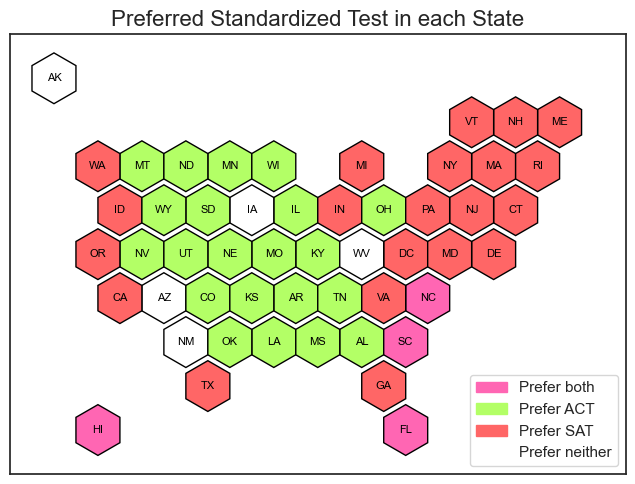

In [60]:
# Create Hex Map - states vs ACT & SAT participation rates

# Function to create a hexagon

def hexagon(x_center, y_center, size):
    """Return the vertices of a pointy-top hexagon centered at (x_center, y_center)."""
    angles = np.linspace(0, 2 * np.pi, 7)[:-1] + np.pi / 6  # Shift by 30 degrees for pointy top
    return [(x_center + size * np.cos(angle), y_center + size * np.sin(angle)) for angle in angles]

# Define custom colors for ranges
custom_colors = ['#ff66b3', '#b3ff66', '#ff6666', '#ffffff']  # Pink, Green, Orange, White

q = .50
q_act_participation = df['act_participation'].quantile(q)
q_sat_participation = df['sat_participation'].quantile(q)

# Function to map value to color based on custom ranges
def get_color(act,sat):
    if act > q_act_participation and sat > q_sat_participation:
        return custom_colors[0]
    elif act > q_act_participation and sat < q_sat_participation:
        return custom_colors[1]
    elif act < q_act_participation and sat > q_sat_participation:
        return custom_colors[2]
    else:
        return custom_colors[3]


# Create a hex map with pointy tops
fig, ax = plt.subplots(figsize=(15, 5))

# Plot hexagons for each state with heat based on values
for idx, row in df.iterrows():
    hex_coords = hexagon(row['x'], row['y'], size=1 / np.sqrt(3))  # Adjust size for hexagon
    hex_shape = patches.Polygon(hex_coords,
                                closed=True,
                                facecolor=get_color(row['act_participation'],row['sat_participation']), 
                                edgecolor='black')

    ax.add_patch(hex_shape)
    
    # Show abbreviated name instead of full name
    # Here we get the state from the coordinates
    ax.text(row['x'], row['y'], row['abbrev'], ha='center', va='center', fontsize=8, color='black')

# Add legend (create patches for each color)
legend_labels = ['Prefer both', 
                 'Prefer ACT', 
                 'Prefer SAT', 
                 'Prefer neither']

color_patches = [patches.Patch(color=custom_colors[0], label=legend_labels[0]),
                 patches.Patch(color=custom_colors[1], label=legend_labels[1]),
                 patches.Patch(color=custom_colors[2], label=legend_labels[2]),
                 patches.Patch(color=custom_colors[3], label=legend_labels[3])]

# Add the legend to the plot
ax.legend(handles=color_patches
          , loc='lower right'
          # , title='Participation Categories'
         )

# Set title and remove axes for a cleaner look
ax.set_title('Preferred Standardized Test in each State', fontsize=16)
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.xlim(min(column_values) - 1, max(column_values) + 1)
plt.ylim(min(row_values) - 1, max(row_values) + 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()

# plt.savefig('preferred_standardized_test.png', format='png', dpi=300)

plt.show()

In [62]:
conditions = [
    (df['act_participation'] > q_act_participation) & (df['sat_participation'] > q_sat_participation), 
    (df['act_participation'] > q_act_participation) & (df['sat_participation'] < q_sat_participation),  
    (df['act_participation'] < q_act_participation) & (df['sat_participation'] > q_sat_participation),
    (df['act_participation'] < q_act_participation) & (df['sat_participation'] < q_sat_participation)
]

# Define the corresponding outputs for each condition
outputs = ['Prefer both', 'Prefer ACT', 'Prefer SAT', 'Prefer neither']

# Create a new column 'prefer' based on the conditions
df['prefer'] = np.select(conditions, outputs, default='Prefer neither')


In [28]:
df.columns

Index(['state', 'act_participation', 'act_english', 'act_math', 'act_reading',
       'act_science', 'act_total', 'sat_participation', 'sat_ebrw', 'sat_math',
       'sat_total', 'x', 'y', 'abbrev', 'prefer'],
      dtype='object')

### Analysis - Subjects to be included in intensive programs

In [68]:
# Mean of all ACT subjects of Prefer ACT states
subjects_act = ['act_english','act_math','act_reading','act_science','act_total']
prefer_act = df[df['prefer'].isin(['Prefer ACT'])][subjects_act].mean().round(2).tolist()

# Mean of all ACT subjects of Prefer both states
prefer_both = df[df['prefer'].isin(['Prefer both'])][subjects_act].mean().round(2).tolist()

# nationwide_act = df[subjects_act].mean().round(2).tolist()

# Difference
difference_act = [ round(prefer_both[i] - prefer_act[i],2 ) for i in range(0,5)]
# difference_act = [ round(prefer_act[i] - nationwide_act[i],2 ) for i in range(0,5)]

In [70]:
prefer_act, prefer_both, difference_act

([19.58, 19.93, 20.71, 20.47, 20.3],
 [18.02, 19.12, 19.73, 19.23, 19.15],
 [-1.56, -0.81, -0.98, -1.24, -1.15])

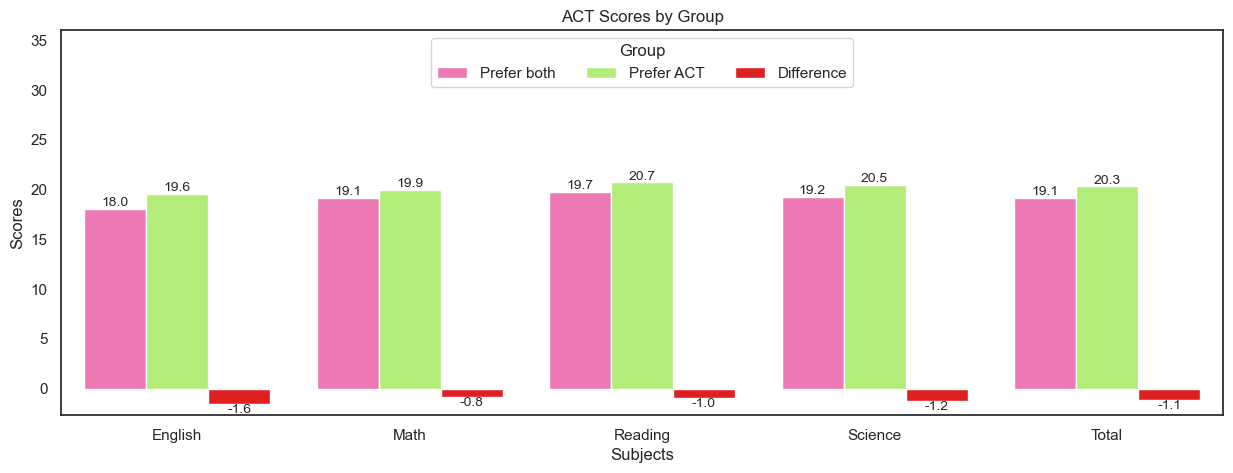

In [74]:
data = {
    'subjects': ['English', 'Math', 'Reading', 'Science', 'Total'] * 3,  # Repeat dimensions for each measure
    'prefers': (['Prefer both'] * 5) + (['Prefer ACT'] * 5) + (['Difference']) * 5,  # Add missing comma here
    'score': prefer_both + prefer_act + difference_act
}

da = pd.DataFrame(data)

plt.figure(figsize=(15, 5))
# Create a bar plot
sns.set_theme(style="white")
ax = sns.barplot(data=da, x='subjects', y='score', hue='prefers', palette=['#ff66b3','#b3ff66', 'red'])

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=10)

plt.title('ACT Scores by Group')
plt.xlabel('Subjects')
plt.ylabel('Scores')
plt.ylim(None, 36)
plt.legend(title='Group', loc='upper center', ncol = 3)
# plt.savefig('ACT Scores by Group.png', format='png', dpi=300)
plt.show()


In [66]:
# Mean of all SAT subjects of Prefer SAT states

subjects_sat= ['sat_ebrw', 'sat_math','sat_total']

prefer_sat = df[df['prefer'].isin(['Prefer SAT'])][subjects_sat].mean().round(2).tolist()

prefer_both = df[df['prefer'].isin(['Prefer both'])][subjects_sat].mean().round(2).tolist()

# Mean of all ACT subjects of Nationwide
# nationwide_sat = df[subjects_sat].mean().round(2).tolist()

# Difference
# difference_sat = [ round(prefer_sat[i] - nationwide_sat[i],2 ) for i in range(0,3)]
difference_sat = [ round(prefer_both[i] - prefer_sat[i],2 ) for i in range(0,3)]

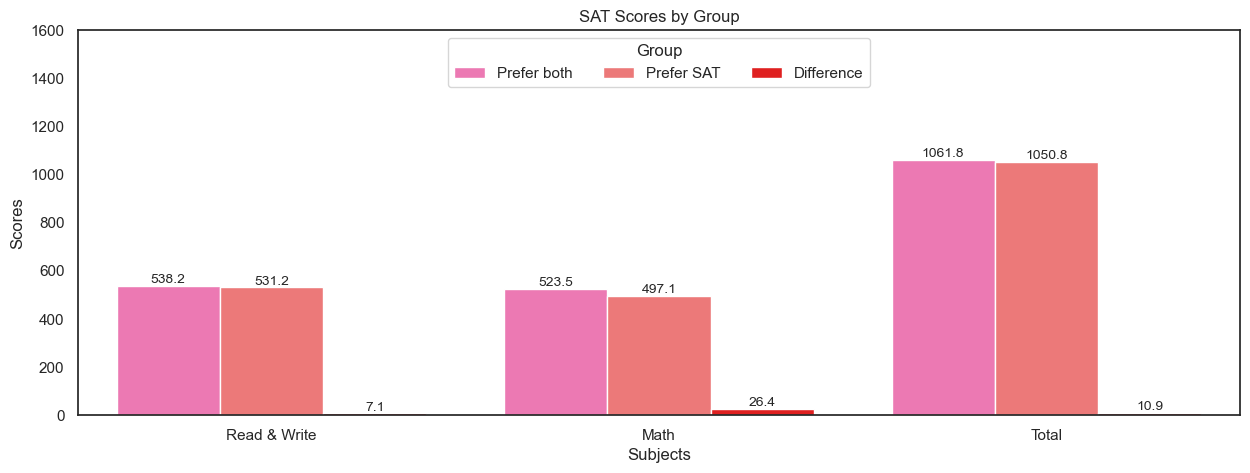

In [64]:
data = {
    'subjects': ['Read & Write', 'Math', 'Total'] * 3,  # Repeat dimensions for each measure
    'prefers': (['Prefer both'] * 3) + (['Prefer SAT'] * 3) + (['Difference']) * 3,  # Add missing comma here
    'score': prefer_both + prefer_sat + difference_sat
}

ds = pd.DataFrame(data)

plt.figure(figsize=(15, 5))
# Create a bar plot
sns.set_theme(style="white")
ax = sns.barplot(data=ds, x='subjects', y='score', hue='prefers', palette=['#ff66b3', '#ff6666', 'red'])

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=10)

plt.title('SAT Scores by Group')
plt.xlabel('Subjects')
plt.ylabel('Scores')
plt.ylim(None, 1600)
plt.legend(title='Group', loc='upper center', ncol = 3)
# plt.savefig('SAT Scores by Group.png', format='png', dpi=300)
plt.show()